# Exploratory Data Analysis (EDA) with Housing Price Dataset (Part II - Bivariate Analysis)


Bivariate analysis is the simultaneous analysis of two variables (attributes). It helps to understand the relationships and patterns between these variables. Depending on the types of variables being analyzed, various techniques and visualizations can be employed.

- Categorical (incl. Discrete numerical) VS Categorical
    - Crosstab
    - Chi-square tests, Cramér's V
    - Visualization: 
        - Stacked or grouped bar charts
        - Frequency heat maps
    
- Categorical VS Continuous
    - Visualization: 
        - Violin Plots
        - Bar Charts
        - Side by side Box Plots

- Continuous VS Continuous
    - Correlation coefficients
    - Visualization: 
        - Scatter plots
        - Line plots
        - Correlation Heatmaps
        - QQ Plot


## Loading and preparing the data

In [15]:
import pandas as pd

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv")

In [10]:
df.shape

(1460, 81)

In [11]:
df = df[df.columns[df.isna().mean() < 0.8]]

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
df.drop('Id', inplace=True, axis=1)

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
potencial_cat_from_num = df.select_dtypes('number').loc[:, df.select_dtypes('number').nunique()<20]

potencial_cat_from_num.head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008


In [23]:
potencial_cat_from_num.PoolArea.unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [26]:
df_cat = pd.concat([potencial_cat_from_num, df.select_dtypes('object')], axis=1)

df_num = df.select_dtypes('number')

df_num.drop(columns=potencial_cat_from_num.columns, inplace=True)

In [27]:
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,250000


In [28]:
df_cat.head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


## Categorical (incl. Discrete numerical) VS Categorical

Let's explore the concept of **analyzing relationships between categorical variables**. We'll do so using statistical tests such as the **chi-square (χ²) test and Cramer's V**, and using visualization tools such as stacked or grouped bar charts. 

### Crosstab
A table showing the frequency of occurrences for combinations of two categorical variables.

We'll begin by creating a crosstab between 'MSZoning' and 'SaleCondition' to observe the interaction between these two categorical variables.

In [29]:
cross = pd.crosstab(df['MSZoning'], df['SaleCondition'])

cross

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
MSZoning,,,,,,
C (all),5,0,1,0,4,0
FV,4,0,0,0,39,22
RH,5,0,0,0,11,0
RL,70,4,9,14,955,99
RM,17,0,2,6,189,4


From the crosstab between `MSZoning` and `SaleCondition`, we observe the following:
- Most houses have a `Normal` sale condition.
- Most houses in the RL (Residential Low Density) zoning area have a `Normal` sale condition, followed by `Partial` and then `Abnorml`.
- The FV (Floating Village Residential) zoning area has a notable number of houses with a `Partial` sale condition, suggesting newer homes or homes that underwent significant renovations.
- The C (all) (Commercial) zoning category mostly consists of houses with `Abnorml` and `Normal` sale conditions. But we have less data of this kind.

### Chi-square tests
Tests the independence of two categorical variables by comparing observed frequencies to expected frequencies.

    - The chi-square test is a statistical test used to **determine whether there is a significant association between two categorical variables**. 
    - Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables. 


Let's perform a Chi-square test for `MSZoning` and `SaleCondition` to determine if they are independent.

In [32]:
from scipy.stats import chi2_contingency


estadistico, p_valor, ex, ddof = chi2_contingency(cross)

estadistico, p_valor

(127.83725428196675, 9.909275301032864e-18)

### Cramér's V

While the Chi-square test informs us about the independence of two categorical variables, Cramér's V measures the strength of the association between them. 

    - Cramer's V is a measure of association used to **quantify the strength of the relationship between categorical variables**. 
    - Interpretation: Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

Let's compute Cramér's V for `MSZoning` and `SaleCondition` to measure the strength of their association.

In [33]:
from scipy.stats.contingency import association

association(cross, method='cramer')

0.14795249508442443

The Cramér's V value of 0.148 suggests a weak association between the two variables. Though statistically significant, the strength of this relationship is not very strong in practical terms.

### Stacked and grouped bar charts
Visualizes the frequency or proportion of categories between two categorical variables.

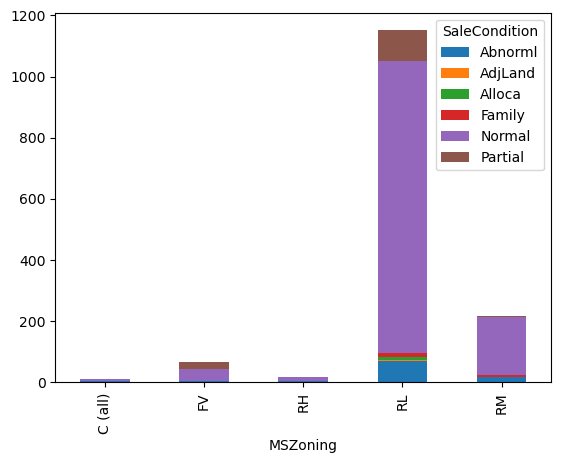

In [35]:
cross.plot(kind='bar', stacked=True);

- The chart vividly illustrates the dominance of the `RL` (Residential Low Density) zoning category in house sales. This category has the most diverse set of `SaleCondition` values, further highlighting its prevalence in the dataset.
- Other zoning categories, like `FV`, `RH`, and `RM`, also predominantly exhibit `Normal` sale conditions.
- It's evident that `Partial` sales are primarily associated with the `RL` and `FV` zoning categories.


Let's look now at a grouped bar chart for the same columns:

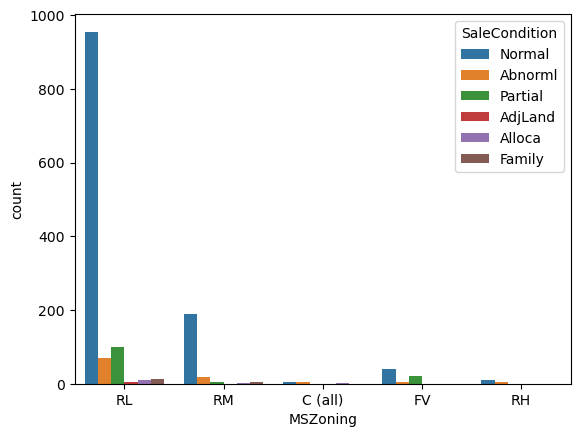

In [36]:
sns.countplot(data=df, x='MSZoning', hue='SaleCondition');

#### Seaborn visualizations and Hue

There are a couple of Seaborn visualizations that allow us to add a categorical variable in the parameter `hue`. By using the `hue` parameter, we can add another dimension of information to our plots. 

### Frequency heat maps
Displays frequencies using color gradients for combinations of two categorical variables.

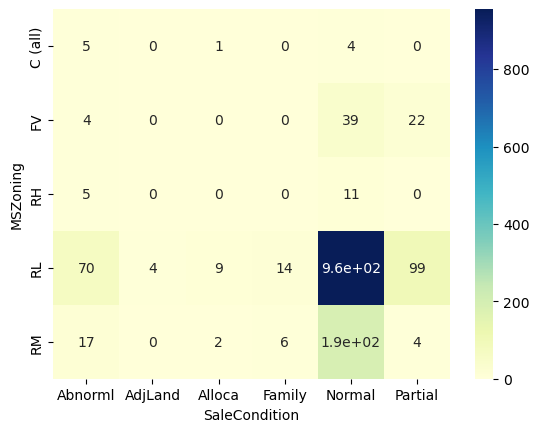

In [38]:
sns.heatmap(cross, annot=True, cmap="YlGnBu");

- The heatmap color intensity shows the frequency count of house sales for each combination of `MSZoning` and `SaleCondition`.
- The darker shades in the `RL` and `Normal` intersection reiterate the high occurrence of this combination.
- There are specific combinations with no occurrences, such as `C (all)` with `Partial` and `RH` with `Partial`, evident from the zeros in the heatmap.


## Categorical VS Continuous

We'll use the `MSZoning` as our categorical variable and `SalePrice` as our continuous variable.

### Violin Plots
Combines a box plot with a kernel density plot to show the distribution of a continuous variable for each category.

The violin plot below will provide a combined view of the distribution of `SalePrice` for each zoning category:

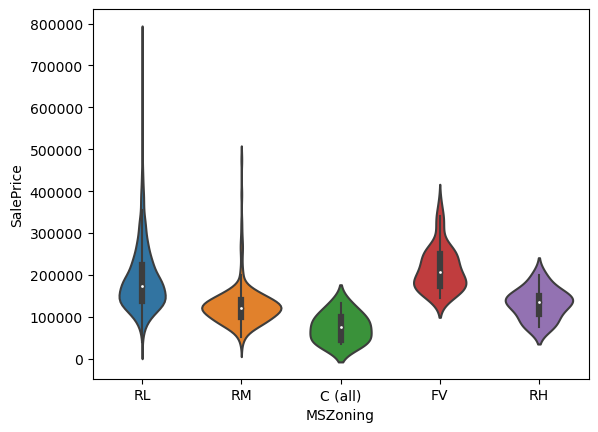

In [40]:
sns.violinplot(data=df, x='MSZoning', y='SalePrice');

- The `RL` (Residential Low Density) category displays a wide range of house prices, with a thicker section around the median, suggesting that most houses in this category fall within this price range.
- The `RM` (Residential Medium Density) category has a more condensed price distribution, with a majority of houses priced in the lower to mid-range.
- The `FV` (Floating Village Residential) category has a bimodal distribution, indicating two major groups of house prices.
- The `RH` (Residential High Density) and `C (all)` (Commercial) categories have fewer data points, but their price distributions are somewhat similar to `RM`.

### Bar Charts
Shows the mean (or another measure of central tendency) of the continuous variable for each category.

This will show the mean (or another measure of central tendency) of the `SalePrice` for each zoning category.

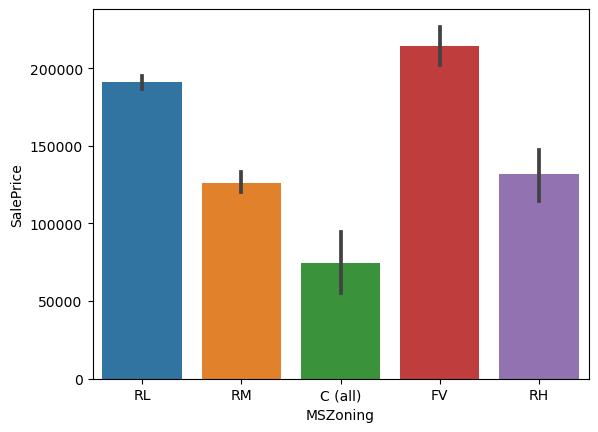

In [41]:
sns.barplot(data=df, x='MSZoning', y='SalePrice');

The bar chart above depicts the average `SalePrice` for each zoning category:

- The `FV` (Floating Village Residential) category has the highest average house price, closely followed by the `RL` (Residential Low Density) category.
- The `RM` (Residential Medium Density) and `RH` (Residential High Density) categories have relatively lower average house prices.
- The `C (all)` (Commercial) category's average house price is the lowest among all the categories.

It's evident that the type of zoning has a considerable impact on the average house price, with certain zones fetching higher prices on average.

### Side by side Box Plots

Box plots are a great way to visualize the distribution of a continuous variable across different categories. They show the median, quartiles, and potential outliers, providing a quick snapshot of the data's spread and central tendency.

Let's visualize the distribution of `SalePrice` for each zoning category using side-by-side box plots. This will help us understand the spread, median, and potential outliers for each category.

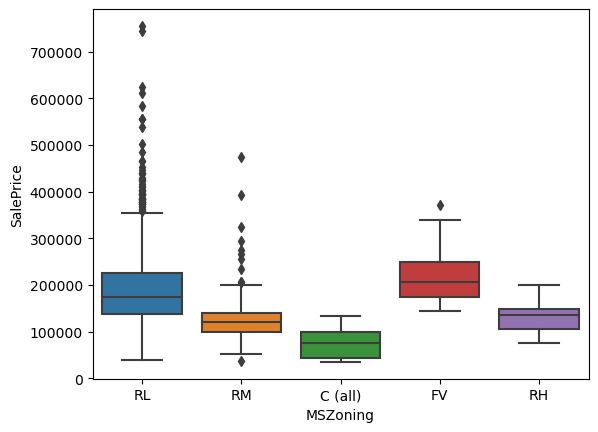

In [42]:
sns.boxplot(data=df, x='MSZoning', y='SalePrice');

- The `FV` (Floating Village Residential) and `RL` (Residential Low Density) zoning categories generally have higher median sale prices compared to other categories.
- The `RL` category, while having a high median sale price, also exhibits a wide range of sale prices, suggesting variability in the type of houses within this category.
- The `C (all)` (Commercial) category has the lowest median sale price and the smallest interquartile range, indicating lesser variability in sale prices within this category.
- The `RM` (Residential Medium Density) category has a lower median sale price compared to `RL` and `FV` but a higher median than the `RH` (Residential High Density) and `C (all)` categories.
- There are noticeable outliers in the `RL` and `RM` categories, with some houses selling at prices much higher than the typical range for those categories.

## Continuous VS Continuous

For this Continuous VS Continuous analysis, let's focus on two continuous variables: `SalePrice` and `GrLivArea` (Above grade (ground) living area square feet). These two variables are often of interest in housing datasets as they represent the sale price and the living area of a house, respectively.

### Correlation coefficients
Quantifies the strength and direction of the relationship between two continuous variables.

We'll begin by calculating the Pearson correlation coefficient between `SalePrice` and `GrLivArea` to quantify their linear relationship.

Let's check the Spearman correlation coefficient between `SalePrice` and `GrLivArea`.

Let's calculate the Spearman correlation coefficients between `SalePrice` and all other numerical variables:

**CAUTION!** The fact that correlation is zero does not mean there are no patterns. It means there is no linear or monotonic relationship.

### Correlation Heatmaps
Visualizes correlation coefficients between pairs of continuous variables using color gradients.

We could also just do the Heatmap for those variables more correlated with SalePrice according to Spearman correlation coefficient.

### Scatter plots
Plots individual data points based on their values for two continuous variables to visualize relationships.

#### Seaborn Joint Plot

`sns.jointplot` is used to create a multi-panel figure that displays a bivariate (two-variable) relationship between two columns of a dataset along with the univariate (single-variable) distribution of each on separate axes.

#### Seaborn Pairplot

`sns.pairplot()` is a function provided by the Seaborn library in Python to create a grid of scatter plots and histograms/KDEs for pairwise relationships in a dataset.

- **Pairwise Scatter Plots**: For each pair of numeric variables in the dataset, a scatter plot is created to visualize their relationship. This helps in spotting any linear or non-linear correlations between variables.
- **Histograms or KDE**: On the diagonal of the grid, sns.pairplot displays histograms (by default) or kernel density estimates (if specified) to show the univariate distribution of each variable.
- **Color by Categories**: You can use the hue parameter to color the data points based on a categorical variable. This can help in understanding how categories might affect relationships between numeric variables.

Let's visualize the pairwise relationship and distributions for "SalePrice" and "GrLivArea" using Seaborn's pairplot.

#### Seaborn lmplot

**Scatter Plot with Regression Line**: By default, it displays a scatter plot of two variables along with a linear regression fit.

- **Color by Categories**: You can use the hue parameter to color the data points based on a categorical variable. This can help in understanding how categories might affect relationships between numeric variables.

We'll use Seaborn's lmplot to visualize the linear relationship between "GrLivArea" (x-axis) and "SalePrice" (y-axis) in the dataframe 'df'. The plot will also display a linear regression fit to the data points.

### Line plots
Connects individual data points with lines. A line plot is particularly useful for visualizing data over time. 

In the dataset, variables such as `YearBuilt` (original construction date) and `YearRemodAdd` (remodel date) are indicative of time. 

Let's visualize the average `SalePrice` over the years based on the `YearBuilt` variable. This will help us understand how the average price of houses has trended over the years they were built.

Here's a line plot that visualizes the median `SalePrice` of houses based on their construction year (`YearBuilt`).

### QQ Plot

The Quantile-Quantile (QQ) plot is a graphical tool to help us assess if a dataset follows a particular theoretical distribution. 
- **Straight Line Alignment**: If the data points (the blue dots) closely follow the red straight line (which represents the standard normal distribution), it suggests that the data is approximately normally distributed.

- **Deviations from the Line**: Deviations of the data points from the red line, especially if systematic, indicate deviations from normality.

Let's generate a QQ plot that compares the quantiles of the `SalePrice` data to the quantiles of a standard normal distribution. 

---

Tukey's test for outliers involves using the interquartile range (IQR) to determine if values are outliers. While there isn't a direct "Tukey's test" function in Python's standard libraries, you can easily compute it using the IQR.

Here's how you can perform Tukey's test for outliers:

1. Calculate the first quartile (Q1) and third quartile (Q3) for the data.
2. Compute the interquartile range: \( \text{IQR} = Q3 - Q1 \).
3. Identify outliers:
   - Values less than \( Q1 - 1.5 \times \text{IQR} \)
   - Values greater than \( Q3 + 1.5 \times \text{IQR} \)

Here's a Python function that implements Tukey's test for outliers:

In [ ]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers


```python
# Example usage:
data_series = df['ColumnName']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
```

This function returns the values in the data that are considered outliers according to Tukey's method.

If you want to **modify the outlier values**, you can replace them with a specific value, such as the median, or the bounds defined by Tukey's method.

If you wish to **delete the outliers**, you can simply filter them out.

Implement these three approaches modifying the function above.